In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_ods_reader import read_ods
from pyexcel import get_book
import re, string

In [4]:
#read file
file = r'MasterFile - Year 2017.ods'
sheet = get_book(file_name=file)
sheet_list = sheet.sheet_names()
sheet_list.remove('Notes')
data = {name: read_ods(file, name) for name in sheet_list}
sheet_list

['G33L Abdominal ',
 'G33L Breasst ',
 'G33L H&N',
 'G33L Prostate',
 'G32G Abdominal',
 'G32G Breast',
 'G32G H&N',
 'G32G Prostate',
 'Diff Abdominal',
 'Diff Breast',
 'Diff H&N',
 'Diff Prostate']

In [5]:
#show data
data['G33L Abdominal '].head()

,ID,DMES,DCAL,G33L,CLG33L,DIFF,MR,05/08/17 – 15/02/28,unnamed.3
0,1.0,1.798717,1.778,0.971,0.04855,NaN,NaN,Gamma average,0.972400
1,2.0,1.779716,1.816,0.968,0.09695,0.003,NaN,STAN-DEV,0.000558
2,3.0,1.762920,1.786,0.999,0.14690,0.031,0.001789,β,6.000000
3,4.0,2.023142,1.991,0.961,0.19495,0.038,0.003789,T,1.000000
4,5.0,2.100162,2.069,0.998,0.24485,0.037,0.005737,Width AL,0.217966


In [17]:
#correct column names
for sheet_name in sheet_list:
    new_column_names = [re.sub('[\W_]', '', name) for name in data[sheet_name].columns.values.tolist()]
    new_column_names[-2:] = ['statistics', 'values']
    data[sheet_name].columns = new_column_names
    
data['Diff Abdominal'].head()

,ID,DMES,DCAL,DIFF,CLDIFF,DIFFMESURA,MR,statistics,values
0,1.0,1.718466,1.722,-0.002052,-0.000103,NaN,NaN,G33L Media,0.000674
1,2.0,2.008513,1.998,0.005262,0.000160,0.007314,NaN,STAN-DEV,0.000217
2,3.0,1.990116,1.956,0.017442,0.001033,0.012180,0.001026,β,6.000000
3,4.0,1.833607,1.869,-0.018937,0.000086,0.036379,0.002941,T,0.000000
4,5.0,1.737101,1.735,0.001211,0.000146,0.020148,0.004001,Width AL,0.088534


In [20]:
#plotting function
def plot_sequence(name, vtype):
    
    CL = data[name]['values'][11]
    LCL = data[name]['values'][12]
    AL = data[name]['values'][13]
    
    fig = plt.figure()
    ax = plt.subplot(111)
    
    if vtype=="G33L":
        ax.plot(data[name].ID, data[name].G33L, 'o-', label="$\gamma$33L")
        ax.set_ylabel(r"Gamma 3% 3mm")
        ax.set_ylim(0.7, 1.05)
    elif vtype=="G32G":
        ax.plot(data[name].ID, data[name].G32G, 'o-', label="$\gamma$32G")
        ax.set_ylabel(r"Gamma 3% 2mm")
        ax.set_ylim(0.7, 1.05)
    elif vtype=="Diff":
        ax.plot(data[name].ID, data[name].DIFF, 'o-', label="%Diff")
        ax.set_ylabel(r"Difference (%)") 
        ax.set_ylim(-0.1, 0.1)
    else:
        raise Exception("Invalid type for the plot")
    
    ax.set_xlabel(r"Measurement Number")
    
    ax.set_title(name)
    
    ax.axhline(y = CL, xmin=0, xmax=20, color="green", linestyle='-', linewidth=1, label='CentL')
    ax.axhline(y = LCL, xmin=0, xmax=20, color="magenta", linestyle='--', linewidth=1, label='LCL')
    ax.axhline(y = AL, xmin=0, xmax=20, color="red", linestyle=(0, (5,10)), linewidth=1, label='AL')
    
    ax.legend(bbox_to_anchor=(1.0,1), loc="upper left")
    
    return ax, fig

(<matplotlib.axes._subplots.AxesSubplot at 0x8795690>,
 <Figure size 432x288 with 1 Axes>)

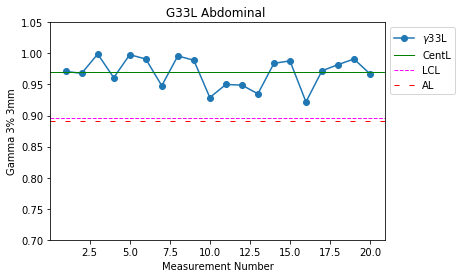

In [8]:
plot_sequence("G33L Abdominal ", "G33L")

(<matplotlib.axes._subplots.AxesSubplot at 0x882d650>,
 <Figure size 432x288 with 1 Axes>)

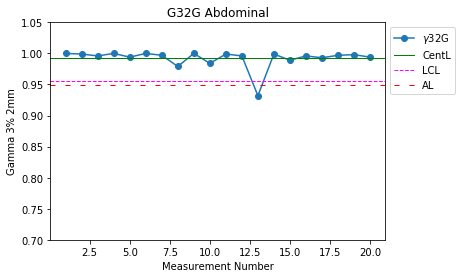

In [10]:
plot_sequence("G32G Abdominal", "G32G")

(<matplotlib.axes._subplots.AxesSubplot at 0x82ceef0>,
 <Figure size 432x288 with 1 Axes>)

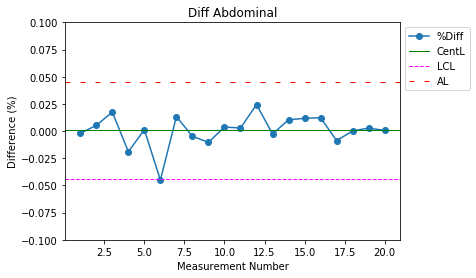

In [21]:
plot_sequence("Diff Abdominal", "Diff")